In [1]:
from keras.preprocessing.image import ImageDataGenerator #обработка изображения
from keras.models import Sequential #Входной массив
from keras.layers import Conv2D, MaxPooling2D #структура 
from keras.layers import Activation, Dropout, Flatten, Dense #функция активации, значение ф.а, выходной слой

import matplotlib.pyplot as plt
%matplotlib inline
from keras.utils import np_utils
from keras.models import model_from_json
from keras.preprocessing import image
import numpy as np

#данные для обучения
train_dir = 'train'
#данные для проверки
val_dir = 'validation'
#данные для тестирования
test_dir = 'test'

import os


Using TensorFlow backend.


In [2]:
os.getcwd()
#os.chdir('F:\YandexDisk\MyStudents\raspoznavanie')

'/home/kikrill/projects/hands'

In [3]:
#размеры изображения для обучения
img_width, img_height = 128, 128
#Размерность  для входных данных в нейронную сеть
input_shape = (img_width, img_height, 3)

In [4]:

#входной слой
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#первый скрытый слой
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#второй скрытый слой
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Activation('sigmoid'))


In [5]:

#компилирование модели методом обратное распространение 
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [6]:
#обрабатка изображения (от 0 до 1)
datagen = ImageDataGenerator(rescale=1. / 255)


In [7]:

#размер выборки
batch_size = 300

#вызов функции для чтения изображения
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')


Found 7375 images belonging to 5 classes.
Found 1499 images belonging to 5 classes.
Found 125 images belonging to 5 classes.


In [10]:
# Удобнее тут, чтобы туда не лазить

#количество эпох
epochs = 1

#количество изображений для обучения
nb_train_samples = 7375
#количество изображений для проверки
nb_validation_samples = 1499
#количество изображений для тестирования
nb_test_samples = 125

In [ ]:
#метод проводящий обучений
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/1
 2/24 [=>............................] - ETA: 34:57 - loss: 1.6302 - accuracy: 0.1967

/home/kikrill/keras_tf/kerastf/lib/python3.6/site-packages/keras/utils/data_utils.py:616: UserWarning: The input 13 could not be retrieved. It could be because a worker has died.
  UserWarning)


 3/24 [==>...........................] - ETA: 33:09 - loss: 1.6012 - accuracy: 0.2300

In [ ]:
accuracy = history.history['acc']
#val_accuracy = history.history['val_acc']
loss = history.history['loss']
#val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, label='Training accuracy')
#plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, label='Training loss')
#plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
#вычисление результата тестирования
#scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
#print("Результат на тестовых данных: %.2f%%" % (scores[1]*100))

print("Сохраняем сеть")
# Сохраняем сеть для последующего использования
# Генерируем описание модели в формате json
model_json = model.to_json()
json_file = open("model_N.json", "wt")
# Записываем архитектуру сети в файл
json_file.write(model_json)
json_file.close()
# Записываем данные о весах в файл
model.save_weights("model_N_W.h5")
print("Сохранение сети завершено")

In [21]:
import os
os.getcwd()

'C:\\Users\\Кирько\\Documents\\LL'

## Done

In [1]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
from keras.models import model_from_json
from keras.preprocessing import image
import matplotlib.pyplot as plt
import keras
#загружаем сохраенные модели и весы
json_file = open("model_N.json", "rt")
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json, custom_objects={'GlorotUniform': keras.initializers.glorot_uniform(seed=None)})
loaded_model.load_weights("model_N_W.h5")
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Введите название изображения для проверки: 8.jpg


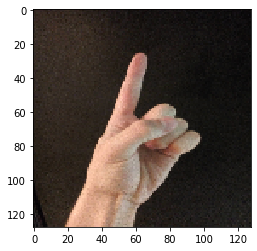

[[[51. 38. 32.]
  [51. 38. 32.]
  [53. 40. 34.]
  ...
  [16. 12. 13.]
  [11.  9. 10.]
  [ 9.  7.  8.]]

 [[43. 34. 29.]
  [51. 40. 34.]
  [55. 41. 38.]
  ...
  [12.  8.  9.]
  [11.  9. 10.]
  [15. 13. 14.]]

 [[52. 34. 32.]
  [46. 37. 30.]
  [55. 47. 36.]
  ...
  [12. 10. 11.]
  [11.  9. 10.]
  [10.  8.  9.]]

 ...

 [[38. 34. 35.]
  [36. 32. 33.]
  [31. 25. 29.]
  ...
  [34. 30. 29.]
  [35. 31. 30.]
  [18. 18. 16.]]

 [[21. 19. 20.]
  [34. 34. 34.]
  [19. 19. 21.]
  ...
  [29. 28. 26.]
  [31. 30. 28.]
  [33. 31. 34.]]

 [[20. 16. 15.]
  [40. 38. 41.]
  [14. 14. 14.]
  ...
  [31. 31. 29.]
  [33. 32. 30.]
  [23. 22. 18.]]]
[[[[0.2        0.14901961 0.1254902 ]
   [0.2        0.14901961 0.1254902 ]
   [0.20784314 0.15686275 0.13333334]
   ...
   [0.0627451  0.04705882 0.05098039]
   [0.04313726 0.03529412 0.03921569]
   [0.03529412 0.02745098 0.03137255]]

  [[0.16862746 0.13333334 0.11372549]
   [0.2        0.15686275 0.13333334]
   [0.21568628 0.16078432 0.14901961]
   ...
   [0.047058

In [17]:
classes = ['1', '2', '3', '4', '5']
#загрузка тестовго изобрадения
img_path = input('Введите название изображения для проверки: ')
#img_path = '6.png'
img = image.load_img(img_path, target_size=(128, 128))
#отображение изображение
plt.imshow(img)
plt.show()
#обработка изобрадения
x = image.img_to_array(img)
print(x)
x /= 255
x = np.expand_dims(x, axis=0)
print(x)

In [19]:
x.shape

(1, 128, 128, 3)

In [20]:
prediction= loaded_model.predict(x)
mx = max(prediction[0])
num = int([i for i,x in enumerate(prediction[0]) if x==mx][0])
#num = int(prediction[0].index(mx))      #[i for i,x in enumerate(prediction[0]) if x==mx][0])
print(num)
print(prediction)
#вывод класса
print(classes[num])
input('Press ENTER to exit')

0
[[4.7043118e-01 3.5881996e-05 4.0531158e-06 2.9802322e-08 7.9879962e-04]]
1
Press ENTER to exit


''

In [ ]:
import cv2
import numpy as np
from PIL import Image

import os
os.getcwd()

im1 = cv2.imread('1.jpg')
im2 = cv2.resize(im1, (128,128))
resize = im2
cv2.imshow('1.jpg',im2)
if cv2.waitKey():
    cv2.destroyAllWindows()
    
gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)

blurred_im = cv2.blur(gray, (5,5))
blurred_im1 = cv2.blur(blurred_im, (5,5))
#blurred_im2 = cv2.blur(blurred_im1, (10,10))

edged = cv2.Canny(blurred_im1,30,200)
cv2.imshow('Canny edges', edged)
if cv2.waitKey():
    cv2.destroyAllWindows()
_, contours, hierarchy = cv2.findContours( edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    # отображаем контуры поверх изображения
max1 = cv2.contourArea(contours[0])
k = 0
max2 = 0
for i in contours:
    
    if cv2.contourArea(i) > max1:
        max1 = cv2.contourArea(i)
        max2 = k
    k += 1
#im2 = cv2.imread()
print(contours)

In [ ]:
import numpy as np
import cv2 as cv
#cv.drawContours( im2, contours, -1, (255,0,0), 3, cv2.LINE_AA, hierarchy, 1 )

In [ ]:
import cv2
cv2.drawContours (im2, contours, -1, (0,0,0), 1)
cv2.imshow('image',im2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
cv2.imshow('Canny edges', edged)
if cv2.waitKey():
    cv2.destroyAllWindows()
_, contours, hierarchy = cv2.findContours( edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

In [ ]:
cv2.drawContours( edged, contours, -1, (255,0,0), 3, cv2.LINE_AA, hierarchy, 1 )

In [ ]:
from PIL import Image, ImageChops
ImageChops.multiply(im2, edged)

In [ ]:
import numpy as np
import scipy.misc as mpl
mpl.imshow('fsdfsdf',im2)
mpl.imsave('01background.bmp', im2)
mpl.imshow('adasd',edged)
mpl.imsave('02testgray.bmp',edged)

In [ ]:
cv2.imwrite("02testgray.png", gray)
cv2.imwrite("01background.png", edged)
imgA = Image.open('01background.png')
imgA.load()
imgB = Image.open('02testgray.png')
imgB.load()


In [ ]:
import numpy as np
import scipy.misc as mpl

a = mpl.imread('01background.png')
b = mpl.imread('02testgray.png')

c = a/((b.astype('float')+1)/256)
d = c*(c < 255)+255*np.ones(np.shape(c))*(c 1
e = d.astype('uint8')

mpl.imshow(e)
mpl.imsave('output.png', e)